## Set up a data science environment

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('./titanic3.csv')
print(data.head(2))

   pclass  survived                            name     sex    age  sibsp  \
0       1         1   Allen, Miss. Elisabeth Walton  female  29.00      0   
1       1         1  Allison, Master. Hudson Trevor    male   0.92      1   

   parch  ticket      fare    cabin embarked boat  body  \
0      0   24160  211.3375       B5        S    2   NaN   
1      2  113781  151.5500  C22 C26        S   11   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  


In [48]:

cols = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
data.columns  = cols
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [49]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [50]:
data.notnull().sum()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [51]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [53]:
for col in data.columns:
     print('{} : {}'.format(col,data[col].unique()))

pclass : [1 2 3]
survived : [1 0]
name : ['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ... 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']
sex : ['female' 'male']
age : [29.    0.92  2.   30.   25.   48.   63.   39.   53.   71.   47.   18.
 24.   26.   80.     nan 50.   32.   36.   37.   42.   19.   35.   28.
 45.   40.   58.   22.   41.   44.   59.   60.   33.   17.   11.   14.
 49.   76.   46.   27.   64.   55.   70.   38.   51.   31.    4.   54.
 23.   43.   52.   16.   32.5  21.   15.   65.   28.5  45.5  56.   13.
 61.   34.    6.   57.   62.   67.    1.   12.   20.    0.83  8.    0.67
  7.    3.   36.5  18.5   5.   66.    9.    0.75 70.5  22.5   0.33  0.17
 40.5  10.   23.5  34.5  20.5  30.5  55.5  38.5  14.5  24.5  60.5  74.
  0.42 11.5  26.5 ]
sibsp : [0 1 2 3 4 5 8]
parch : [0 2 1 4 3 5 6 9]
ticket : ['24160' '113781' '19952' '13502' '112050' '11769' 'PC 17609' 'PC 17757'
 'PC 17477' '19877' '27042' 'P

In [54]:
for colm in data.columns:
    data[colm].replace('?', np.nan, inplace= True)
    data[colm].replace({np.nan:0},inplace=True)
    data[colm].replace({'male':'M'},inplace=True)
    data[colm].replace({'female':'F'},inplace=True)
    data= data.astype({"age": np.float64, "fare": np.float64})
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",F,29.00,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",M,0.92,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",F,2.00,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",M,30.00,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,25.00,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"


In [55]:
data.notnull().sum()

pclass       1309
survived     1309
name         1309
sex          1309
age          1309
sibsp        1309
parch        1309
ticket       1309
fare         1309
cabin        1309
embarked     1309
boat         1309
body         1309
home.dest    1309
dtype: int64

In [56]:
data.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [57]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [58]:
colms = [  'age','body']
for col in colms:
    data[col]=pd.to_numeric(data[col])
    data[col].fillna(data[col].mean(), inplace=True)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",F,29.00,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",M,0.92,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",F,2.00,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",M,30.00,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,25.00,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"


/var/folders/fd/45dh0_x9149cf4pk88rsgmtm0000gs/T/ipykernel_1322/2273044208.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')


<AxesSubplot: >

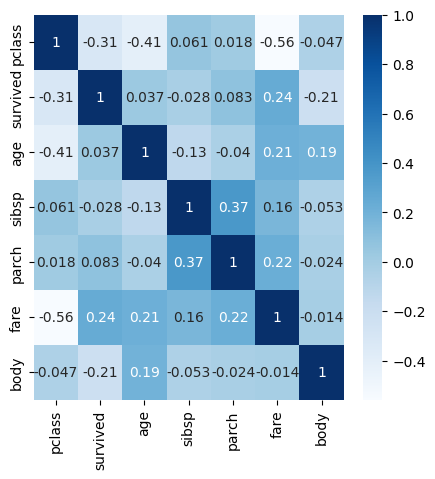

In [59]:
import matplotlib.pyplot as plt
import os
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

In [60]:
data.mean()

/var/folders/fd/45dh0_x9149cf4pk88rsgmtm0000gs/T/ipykernel_1322/531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


pclass       2.294882
survived     0.381971
age         23.877517
sibsp        0.498854
parch        0.385027
fare        33.270043
body        14.864782
dtype: float64

<AxesSubplot: >

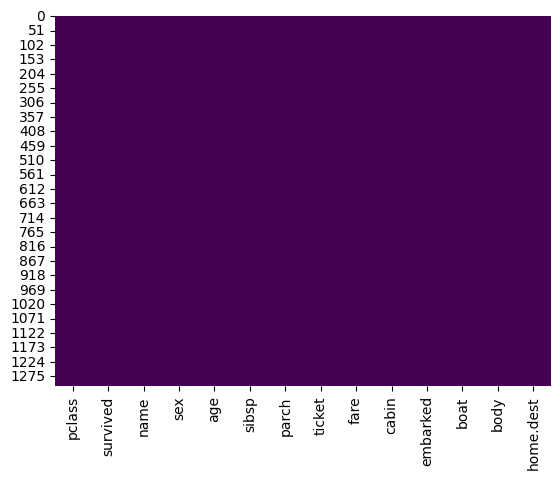

In [61]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

Text(0, 0.5, 'age')

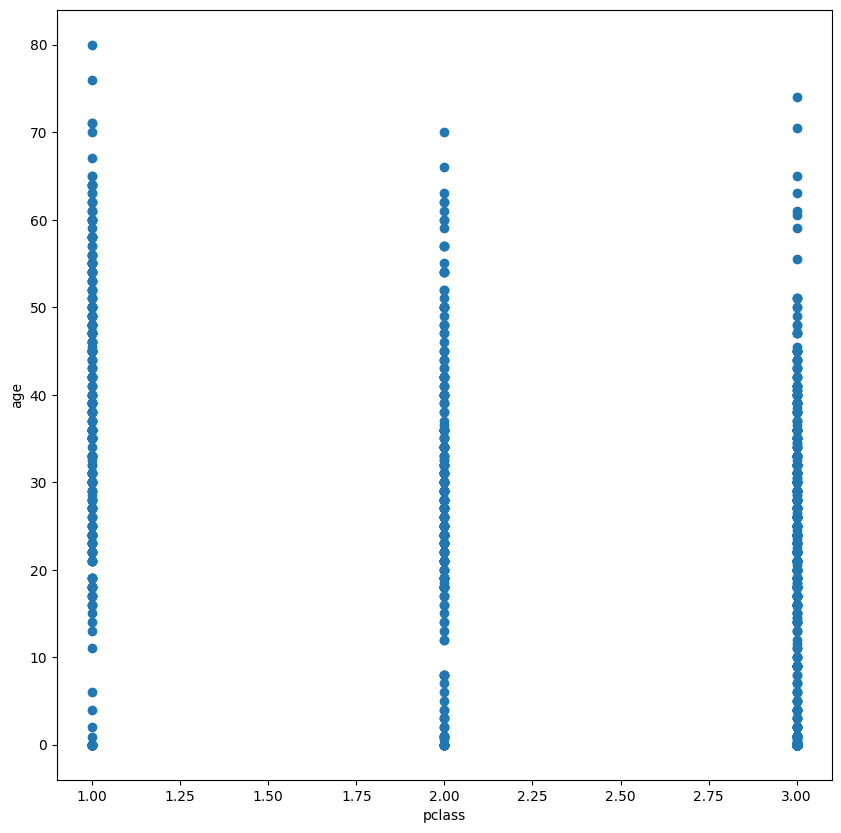

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(x='pclass',y='age',data=data)
plt.xlabel('pclass')
plt.ylabel('age')

<AxesSubplot: xlabel='pclass', ylabel='Count'>

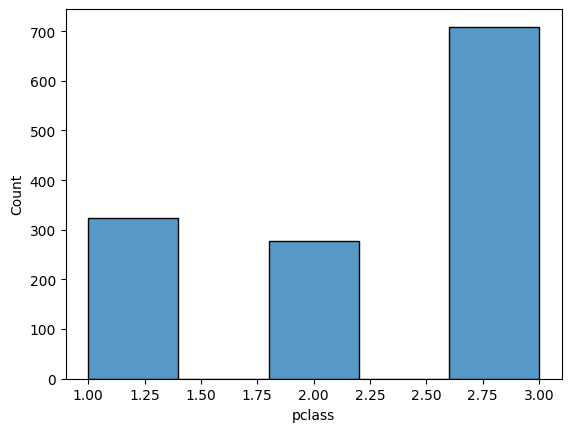

In [63]:
sns.histplot(data.pclass,bins=5)

In [64]:
data.sex.value_counts()

M    843
F    466
Name: sex, dtype: int64

<AxesSubplot: xlabel='pclass', ylabel='sex'>

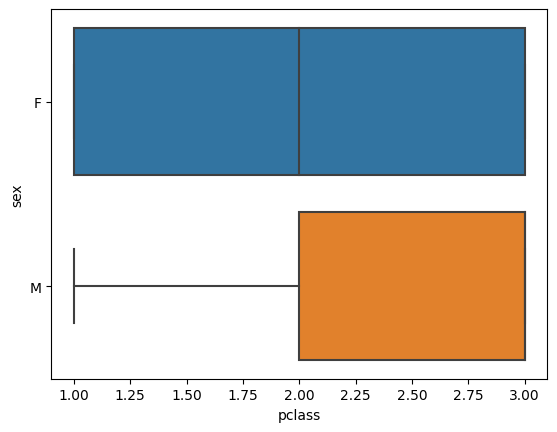

In [65]:
sns.boxplot(x='pclass',y='sex',data=data)

In [66]:
data = data.astype({"age": np.float64, "fare": np.float64})


<AxesSubplot: xlabel='survived', ylabel='fare'>

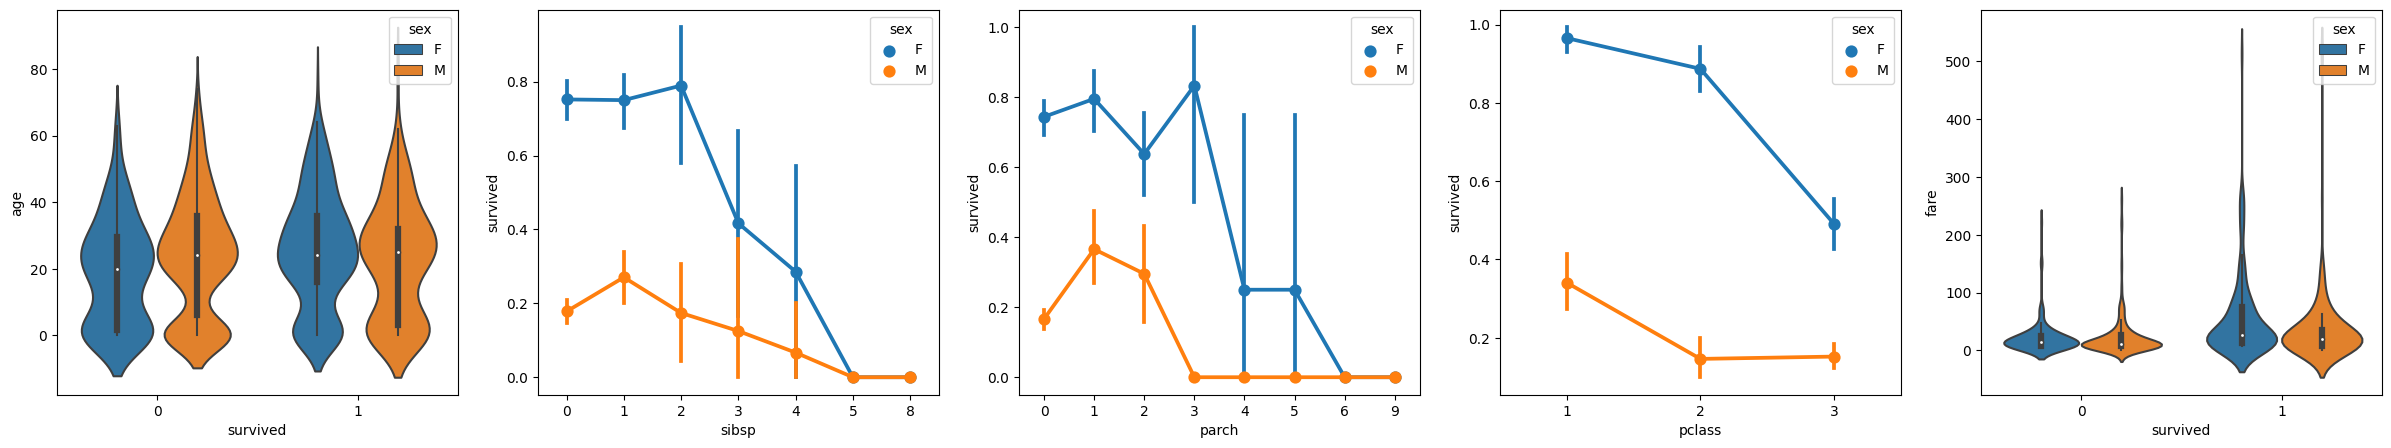

In [67]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [68]:
data.corr().abs()[["survived"]]

/var/folders/fd/45dh0_x9149cf4pk88rsgmtm0000gs/T/ipykernel_1322/143381672.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
age,0.036601
sibsp,0.027825
parch,0.082660
fare,0.244556
body,0.211795


In [69]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

/var/folders/fd/45dh0_x9149cf4pk88rsgmtm0000gs/T/ipykernel_1322/3242586923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
age,0.036601
sibsp,0.027825
parch,0.082660
fare,0.244556
body,0.211795
relatives,0.201719


In [70]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()
print(data.head(3))

  sex  pclass    age  relatives      fare  survived
0   F       1  29.00          0  211.3375         1
1   M       1   0.92          1  151.5500         1
2   F       1   2.00          1  151.5500         0


## Train and evaluate a model

In [71]:
##split up the data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [75]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1047, 4) (262, 4) (1047,) (262,)


In [72]:
##normalizing all the variables
##scale the input values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [73]:
##create and train the algorithm.

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [74]:
##predict the outcome of the test data and 
##calculate the accuracy of the model.
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.6717557251908397
